In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  


In [2]:
main_dir = r'/home/yiting/Documents/GitHub/dgcnn.pytorch/layer_outputs'
dataset_name = 'vhObject'
category_name = 'all'
labels = np.load(os.path.join(main_dir, dataset_name, category_name, 'test_labels.npy')) # axial = 1, torso = 2, sheet = 3
features = np.load(os.path.join(main_dir, dataset_name, category_name, 'second-to-last_layer_outputs.npy'))

In [ ]:
# Keep the first dimension and flatten other dimensions if needed
# features = features.reshape(features.shape[0],-1)

# Note
# The outputs from conv1-5 are too large. It crashes when I run TSNE. 


In [ ]:
####### 2D tSNE plot #######
# Step 1: Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
features_tsne = tsne.fit_transform(features)

# Step 2: Create a scatter plot with labels for coloring
plt.figure(figsize=(10, 8))
sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=labels, palette='viridis', s=30, legend='full')

# Customize plot
plt.title('The second-to-last layer outputs of DGCNN\n(cls_1024, ' + dataset_name + ', ' + 
          category_name + ', ' + str(features.shape[0]) + ' samples, ' + str(features.shape[1]) + ' features)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(fontsize = 10,title='Labels', bbox_to_anchor=(1.02, 1), loc='upper left')  # Optional legend positioning
plt.tight_layout()  # Adjust layout to make room for legend

# Step 3: Save the figure
plt.savefig(os.path.join(main_dir, dataset_name, category_name, 'tsne_dgcnn_cls_1024_second-to-last.png'), bbox_inches='tight')  



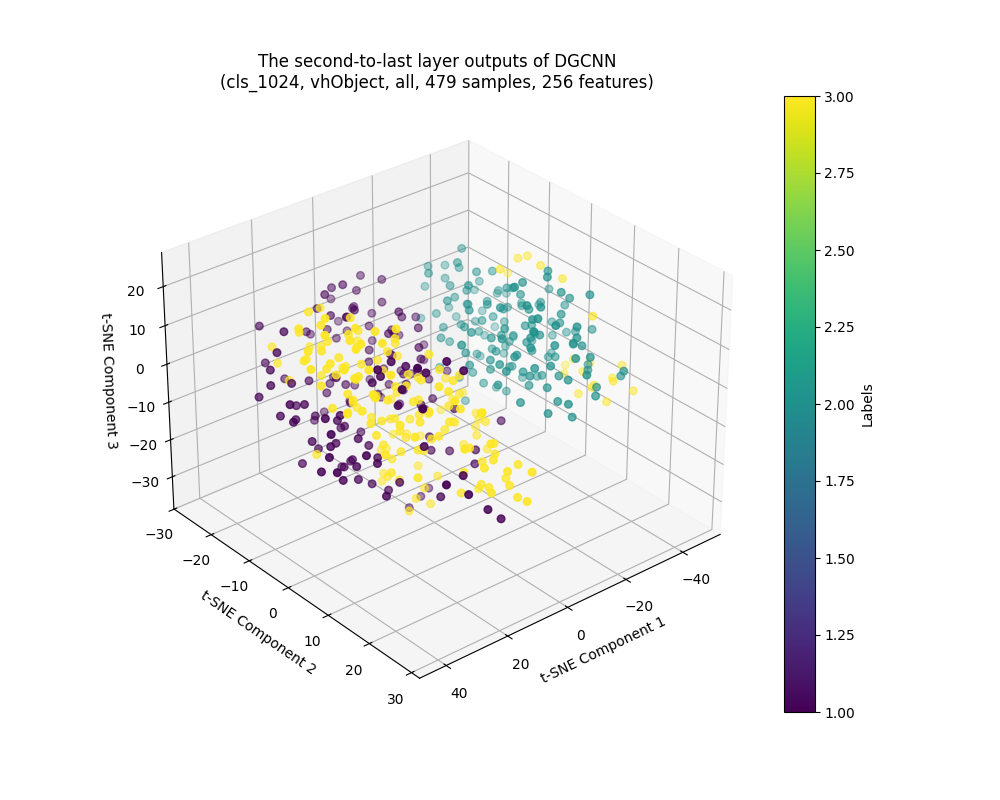

In [3]:
####### 3D tSNE plot #######
# Enable interactive notebook mode
%matplotlib widget

# Step 1: Perform t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42, perplexity=30)
features_tsne = tsne.fit_transform(features)

# Step 2: Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot using the 3D t-SNE components
scatter = ax.scatter(features_tsne[:, 0], features_tsne[:, 1], features_tsne[:, 2], 
                     c=labels, cmap='viridis', s=30)

# Customize plot
ax.set_title('The second-to-last layer outputs of DGCNN\n(cls_1024, ' + dataset_name + ', ' + 
             category_name + ', ' + str(features.shape[0]) + ' samples, ' + str(features.shape[1]) + ' features)',
               fontsize=12)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# Set the viewing angle (rotate the plot)
ax.view_init(elev=30, azim=50)  # Rotate: Elevation 30, Azimuth 120

# Step 3: Add color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Labels')

# Step 4: Save the 3D t-SNE plot
output_path = os.path.join(main_dir, dataset_name, category_name, '3d_tsne_dgcnn_cls_1024_second-to-last.png')
os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Ensure the directory exists
plt.savefig(output_path, bbox_inches='tight')

plt.show()